## Problem 0: Path manager implementation
Implement the following and ensure the unit tests pass.
* `chap11/dubins_parameters.py`:
  * `compute_parameters(...)`
  * `calculate_rsr(...)`
  * `calculate_rsl(...)`
  * `calculate_lsr(...)`
  * `calculate_lsl(...)`
* `chap11/dubins_manager.py`:
  * `dubins_manager(...)`
  * `construct_dubins_circle_start(...)`
  * `construct_dubins_line(...)`
  * `construct_dubins_circle_end(...)`

### Hints on implementation
* `mod(...)` defined in `dubins_parameters.py` will prove helpful for calculating arc lengths


### Note on the unit tests
There will only be unit tests for `calculate_rsr(...)`, `calculate_rsl(...)`, `calculate_lsr(...)`, `calculate_lsl(...)`.

In [2]:
import mav_sim.parameters.planner_parameters as PLAN
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap11.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_waypoints import MsgWaypoints

from mav_sim.chap11.waypoint_viewer import WaypointViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if "waypoint_view" not in globals():
    print("Initializing waypoint viewer")
    global waypoint_view
    waypoint_view = WaypointViewer()
if "data_view" not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()

# Initialize the simulation parameters
sim_params_default = MsgSimParams(
    end_time=130.0, video_name="cha11b.avi"
)  # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(
    waypoints: MsgWaypoints, sim_params: MsgSimParams = sim_params_default
):
    global waypoint_view
    global data_view
    data_view.reset(sim_params.start_time)
    waypoint_view.plot_initialized = False
    (waypoint_view, data_view) = run_sim(
        sim=sim_params,
        waypoints=waypoints,
        init_state=state,
        waypoint_view=waypoint_view,
        data_view=data_view,
    )
    display_data_view(data_view)
    display_mav_view(waypoint_view)

136.62760706610337
Initializing waypoint viewer
Initializing data_view


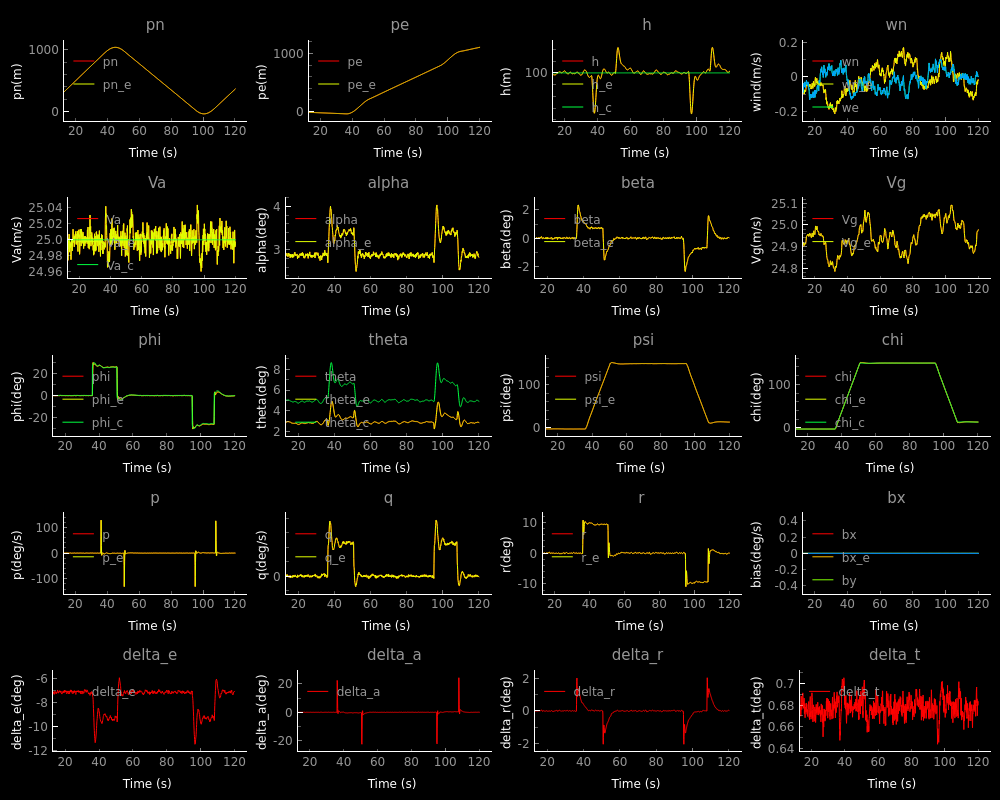

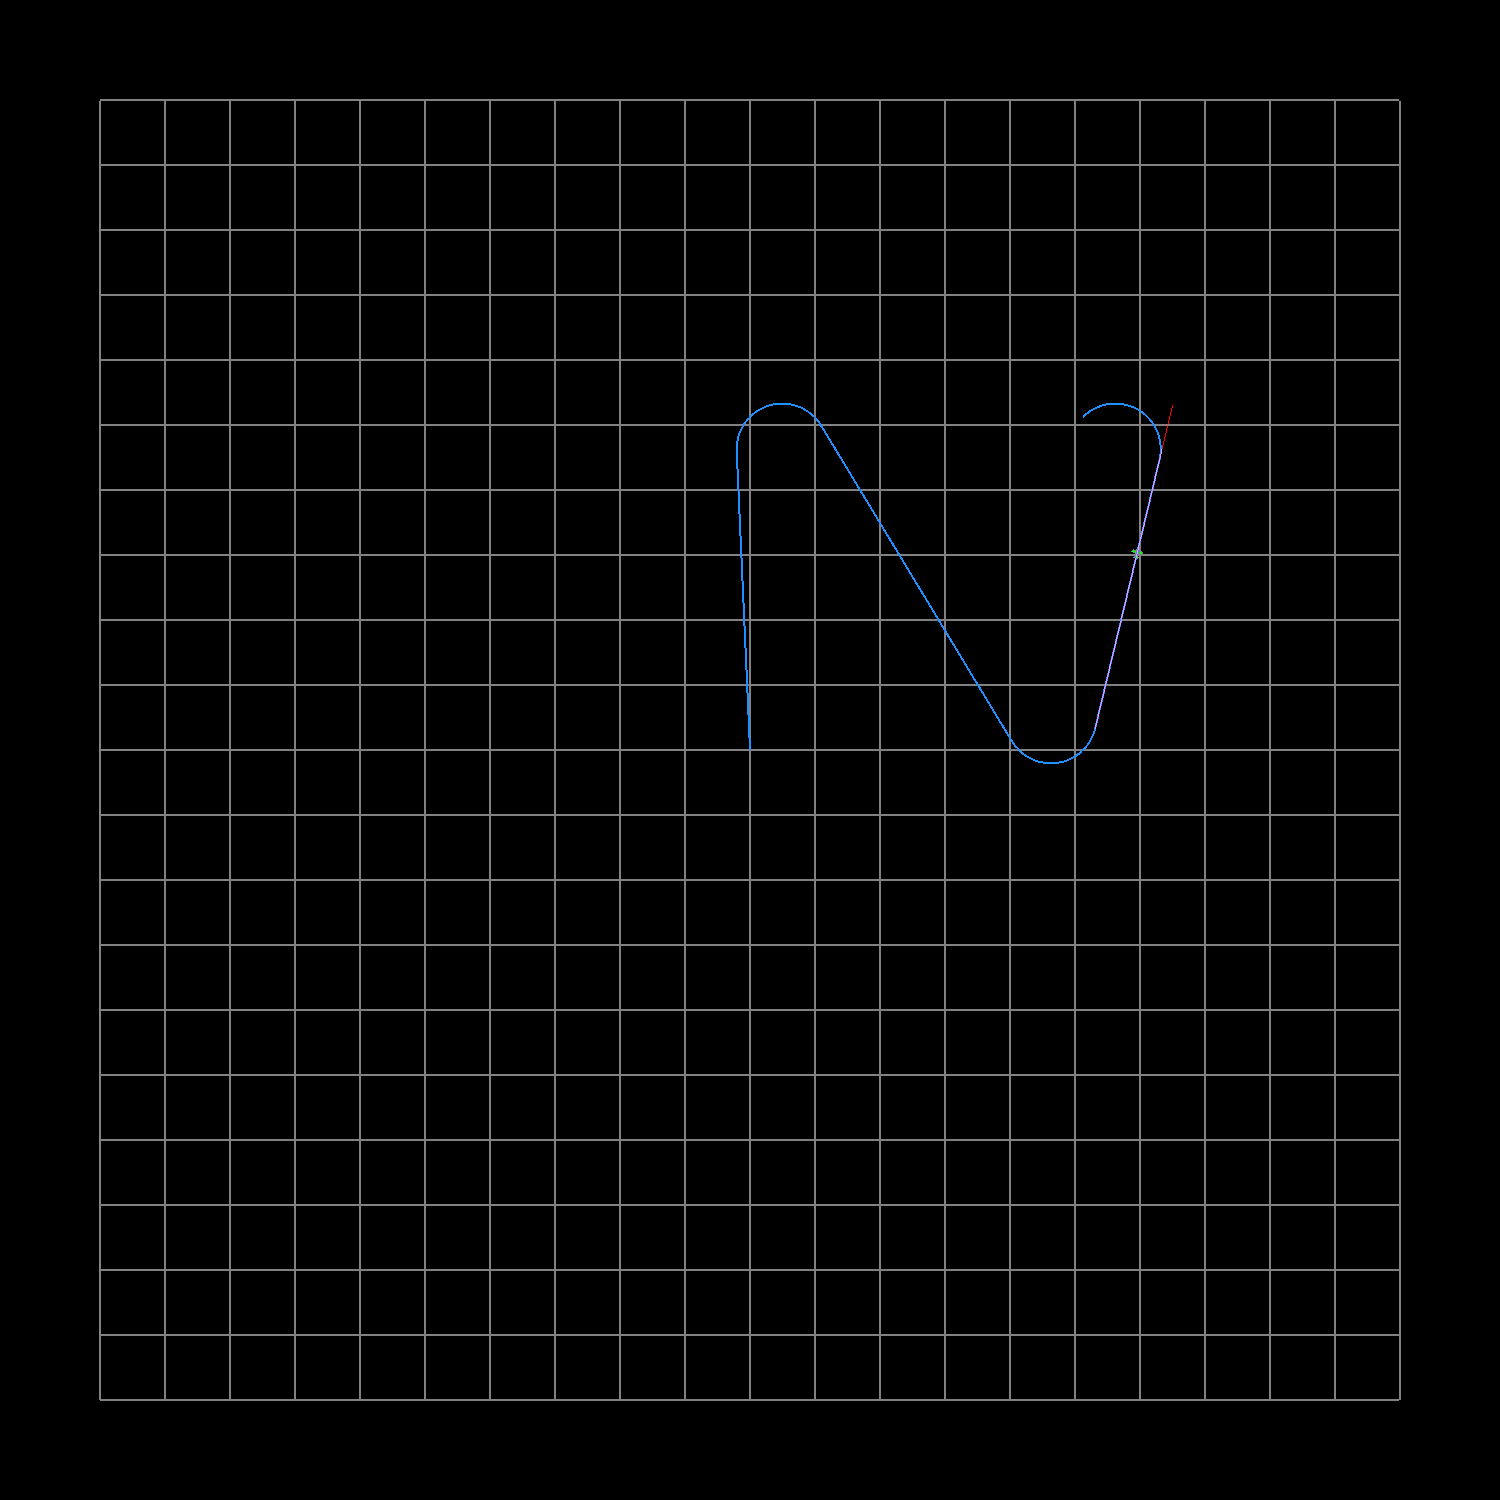

In [3]:
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "dubins"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[1000, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[0, 1000, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[1000, 1000, -100]]).T, Va, np.radians(-135), np.inf, 0, 0)
waypoints.flag_waypoints_changed = True
waypoints.plot_updated = False

# Run the simulation
run_sim_and_display(waypoints=waypoints)

## Problem 1: Path with different orientations
Use the positions of the four waypoints from Problem 0 with orientation of waypoint zero set to zero and the orientation of the other waypoints set to -45 degrees. What do you notice when comparing the results of problems 0 and 1?

The path ended diverging significantly because of the orientation of the waypoints it caused the path to have more abrupt shifts at the end.

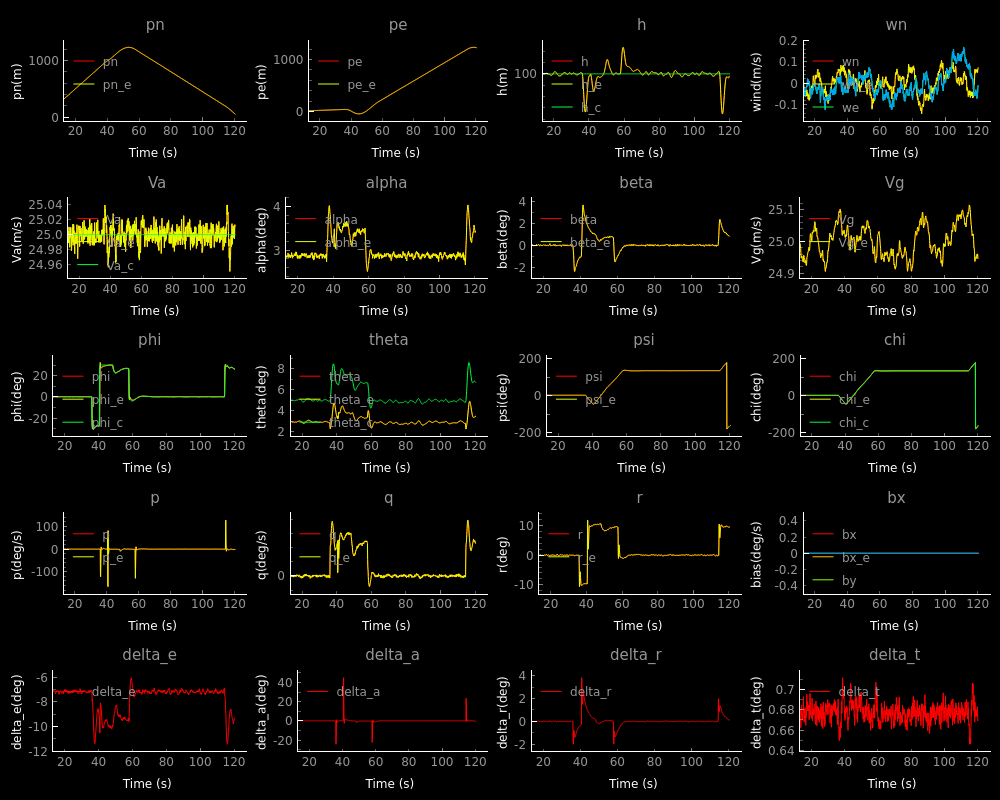

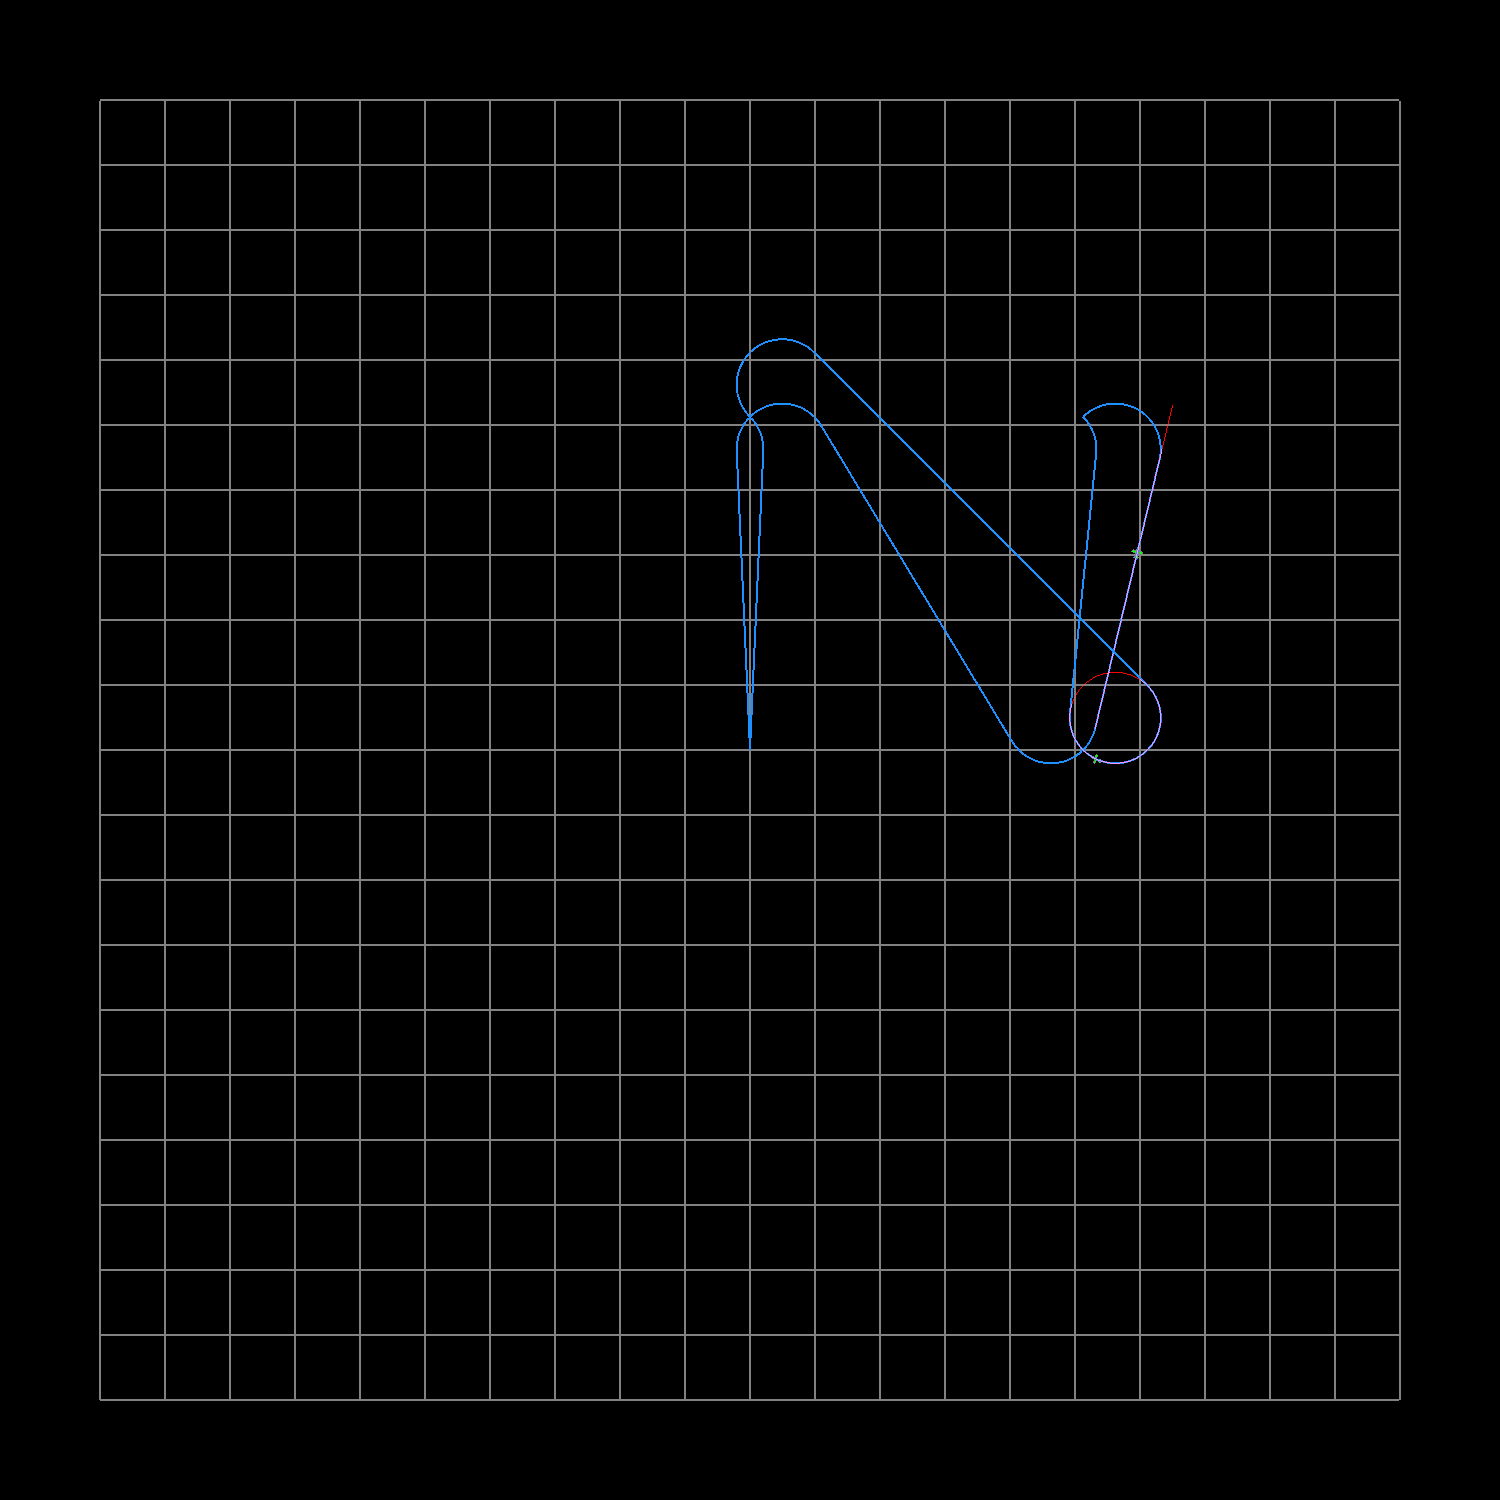

In [4]:
# Code goes here
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "dubins"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[1000, 0, -100]]).T, Va, np.radians(-45), np.inf, 0, 0)
waypoints.add(np.array([[0, 1000, -100]]).T, Va, np.radians(-45), np.inf, 0, 0)
waypoints.add(np.array([[1000, 1000, -100]]).T, Va, np.radians(-45), np.inf, 0, 0)
waypoints.flag_waypoints_changed = True
waypoints.plot_updated = False

# Run the simulation
run_sim_and_display(waypoints=waypoints)

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ mav_sim/chap11/ book_assignments
```
Success: no issues found in 53 source files

Terminal output (should indicate no error):
```
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)

```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ mav_sim/chap4/ mav_sim/chap5/ mav_sim/chap6/ mav_sim/chap10/ mav_sim/chap11/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)(put results here)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!` If it does, then write an explanation of why those failed tests are okay. For example, you may describe that the function is testing a fringe case where the value changes at $\pi/2$. Your function behaves well up to the boundary, but perhaps struggles with some points that are numerically on / close to the boundary.

### Reasoning for results not being perfect on the unit tests
(For each unit test that failed, write a brief explanation of why it is okay that it failed)

In [5]:
from mav_sim.unit_tests.ch11b_dubins_path_manager_test import run_tests

run_tests()
# If you want to run a specific test
# run_tests(<the_test_number>)

Starting RSR test
Starting RSL test
Starting LSR test
Starting LSL test
End of test

